### Members

1. Trần Đăng Quang - 52000118
2. Lê Công Nghĩa - 52000691
3. Nguyễn Thị Thanh Hiền - 52000835

## Table of Contents
1. [Libraries](#library)
    - [Data Preprocessing](#preprocess)
    - [Data Visualization](#visualize)
2. [Apply models](#basic_ensemble)
    - [Basic models](#basic)
    - [Ensemble learning models](#ensemble)
3. [Feed Forward Neural Network and Reccurent Neural Network](#neural_network)
    - [Feed Forward Neural Network](#mlp)
    - [Recurrent Neural Network](#rnn)
4. [Avoid Overfitting](#overfitting)
    - [Add more data](#more_data)
    - [Early Stopping](#early_stopping)
5. [Optimize performance](#optimize)


<a id="library"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           text-align: center;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;"> 1. Analyze
</h1>
</div>

Preprocessing, draw chart to understand data

In [239]:
from keras.layers import SimpleRNN
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.regularizers import l2

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import tensorflow as tf
import pandas_ta as ta
import seaborn as sns
import pandas as pd
import numpy as np
import time
import os

# Create folder (if not exist) to store reusable items!!!
images_path = './images'
if not os.path.exists(images_path):
    os.makedirs(images_path)
models_path = './saved_models'
if not os.path.exists(models_path):
    os.makedirs(models_path)

In [153]:
## Read data
df = pd.read_csv('FB.csv')
df.head()

Date       Open       High        Low      Close  Adj Close  \
0  2012-05-18  42.049999  45.000000  38.000000  38.230000  38.230000   
1  2012-05-21  36.529999  36.660000  33.000000  34.029999  34.029999   
2  2012-05-22  32.610001  33.590000  30.940001  31.000000  31.000000   
3  2012-05-23  31.370001  32.500000  31.360001  32.000000  32.000000   
4  2012-05-24  32.950001  33.209999  31.770000  33.029999  33.029999   

      Volume  
0  573576400  
1  168192700  
2  101786600  
3   73600000  
4   50237200

In [154]:
sum(df['Close'] - df['Adj Close'])

0.0

In [155]:
#drop Adj Close
if 'Adj Close' in df.columns:
    df.drop('Adj Close',axis=1,inplace=True)
    print(df.head())

         Date       Open       High        Low      Close     Volume
0  2012-05-18  42.049999  45.000000  38.000000  38.230000  573576400
1  2012-05-21  36.529999  36.660000  33.000000  34.029999  168192700
2  2012-05-22  32.610001  33.590000  30.940001  31.000000  101786600
3  2012-05-23  31.370001  32.500000  31.360001  32.000000   73600000
4  2012-05-24  32.950001  33.209999  31.770000  33.029999   50237200


In [156]:
## The shape of dataframe
df.shape

(2479, 6)

In [157]:
## Attribute of dataframe
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [158]:
## Overall about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2479 non-null   object 
 1   Open    2479 non-null   float64
 2   High    2479 non-null   float64
 3   Low     2479 non-null   float64
 4   Close   2479 non-null   float64
 5   Volume  2479 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 116.3+ KB


<div id="preprocess"></div>
<h5 style = "font-family:georgia; font-size:35px; background-color: white; color : RebeccaPurple; border-radius: 100px 100px; text-align:left"> Data Preprocessing </h5>

In [159]:
## Checking null values
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [160]:
## Checking duplicated rows
df.duplicated().sum()

0

In [161]:
## Converting datatype
df['Date'] = pd.to_datetime(df['Date'])

<div id="visualize"></div>
<h5 style = "font-family:georgia; font-size:35px; background-color: white; color : RebeccaPurple; border-radius: 100px 100px; text-align:left"> Data Visualization </h5>

<AxesSubplot:>

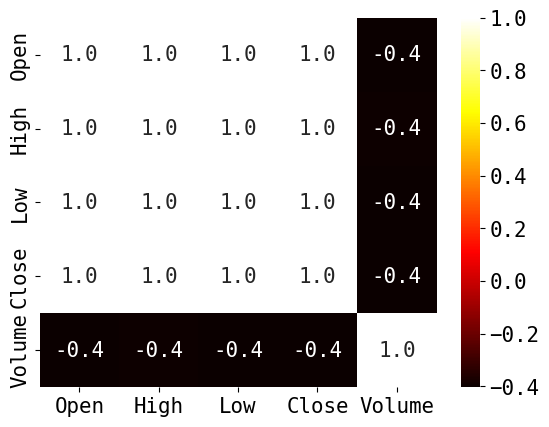

In [162]:
## Correlation of each column
sns.heatmap(df.corr(), cmap='hot', annot=True, fmt='.1f')

- Độ tương quan giữa các cột là rất cao

<a id="ana"></a>
<h5 style = "font-family:verdana; font-size:20px; background-color: white; color : RebeccaPurple;  text-align:left">Analysis on Open, High, Low and Close from 2012-current year</h5>

In [163]:
df_analysis = df.copy()
#Setting Date as Index
df_analysis.set_index('Date',inplace=True)
df_analysis.head()

Open       High        Low      Close     Volume
Date                                                             
2012-05-18  42.049999  45.000000  38.000000  38.230000  573576400
2012-05-21  36.529999  36.660000  33.000000  34.029999  168192700
2012-05-22  32.610001  33.590000  30.940001  31.000000  101786600
2012-05-23  31.370001  32.500000  31.360001  32.000000   73600000
2012-05-24  32.950001  33.209999  31.770000  33.029999   50237200

In [164]:
# Volumn is analyzed below
xdf = df_analysis.drop('Volume',axis=1)
xdf

Open        High         Low       Close
Date                                                      
2012-05-18   42.049999   45.000000   38.000000   38.230000
2012-05-21   36.529999   36.660000   33.000000   34.029999
2012-05-22   32.610001   33.590000   30.940001   31.000000
2012-05-23   31.370001   32.500000   31.360001   32.000000
2012-05-24   32.950001   33.209999   31.770000   33.029999
...                ...         ...         ...         ...
2022-03-18  206.699997  216.800003  206.000000  216.490005
2022-03-21  214.500000  214.710007  207.630005  211.490005
2022-03-22  211.369995  219.460007  210.179993  216.649994
2022-03-23  213.330002  216.800003  212.160004  213.460007
2022-03-24  215.000000  220.669998  214.789993  219.570007

[2479 rows x 4 columns]

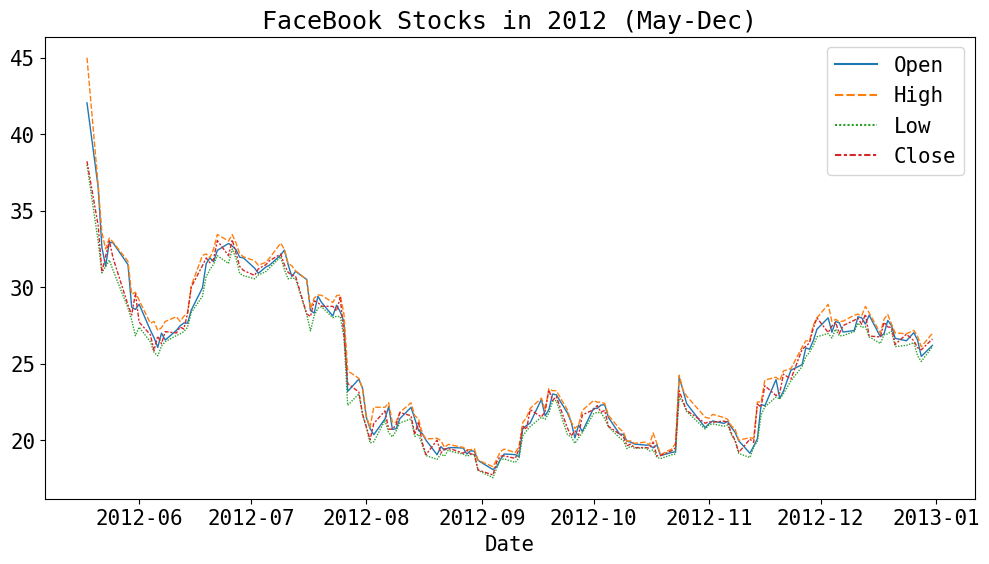

In [165]:
# FaceBook Stocks in 2012 (May-Dec)
plt.figure(figsize=(12,6))
sns.lineplot(data=xdf.loc['2012-05-18':'2012-12-31'],linewidth=1)
plt.title('FaceBook Stocks in 2012 (May-Dec)')
plt.show()

- Từ biểu đồ, ta thấy giá cổ phiếu của năm 2012 biến động theo chiều hướng giảm

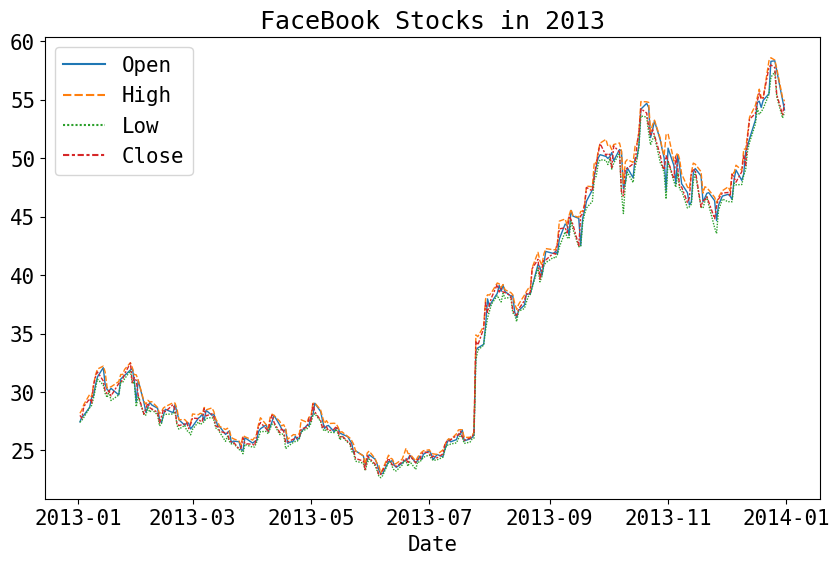

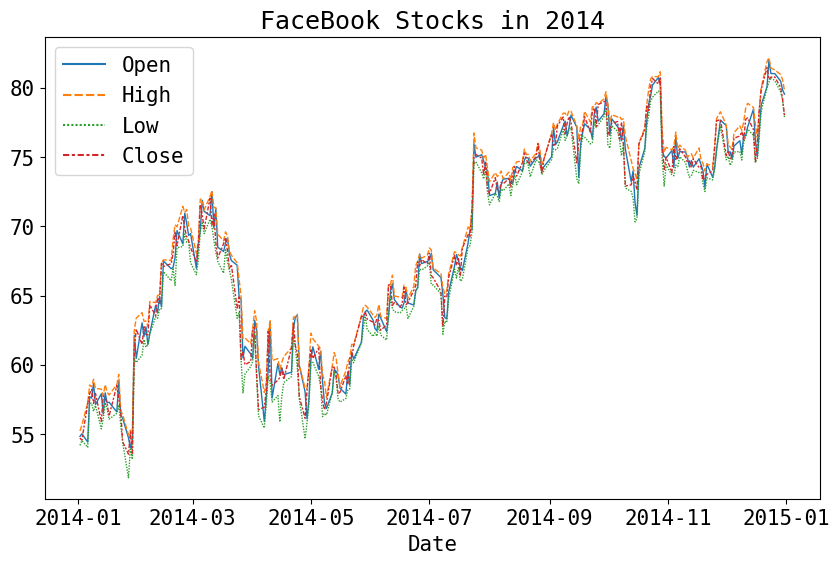

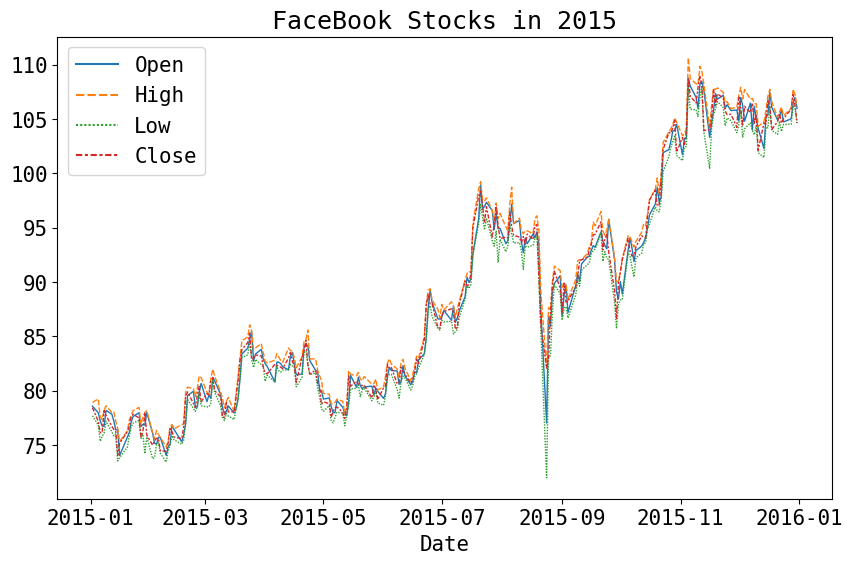

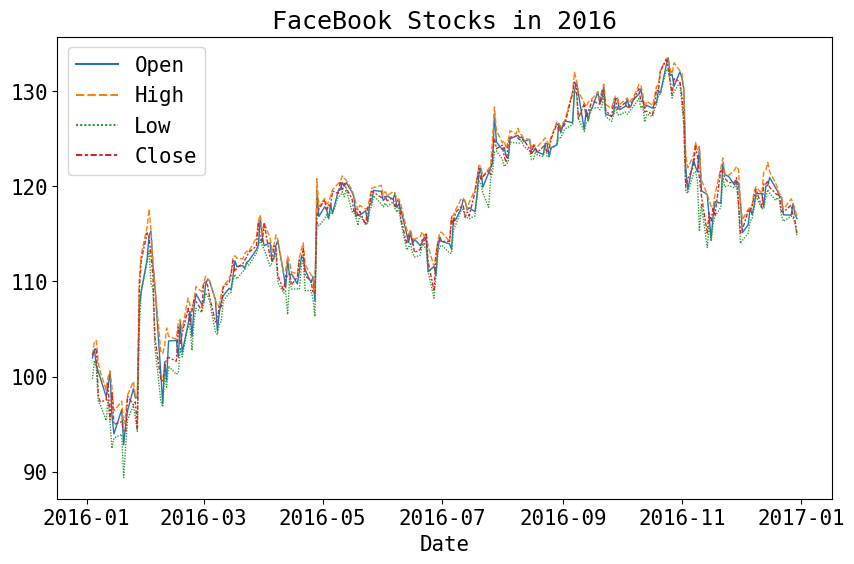

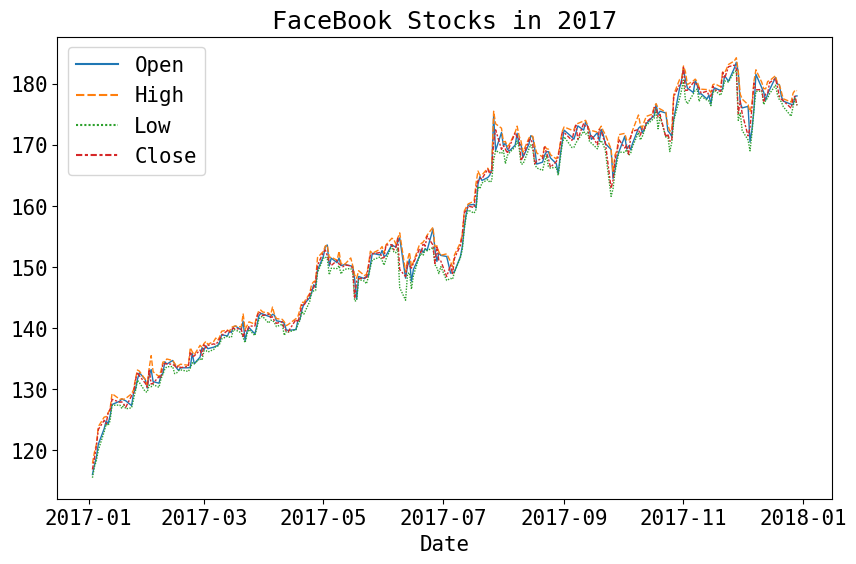

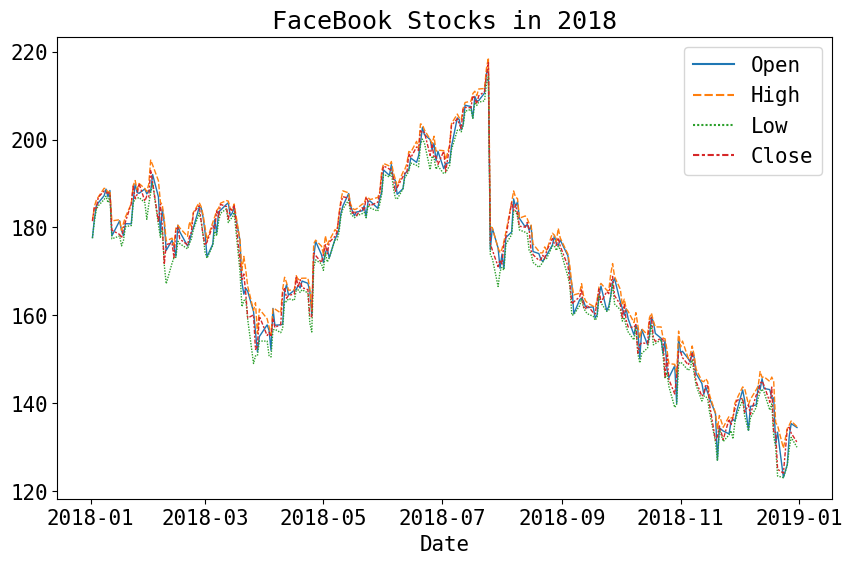

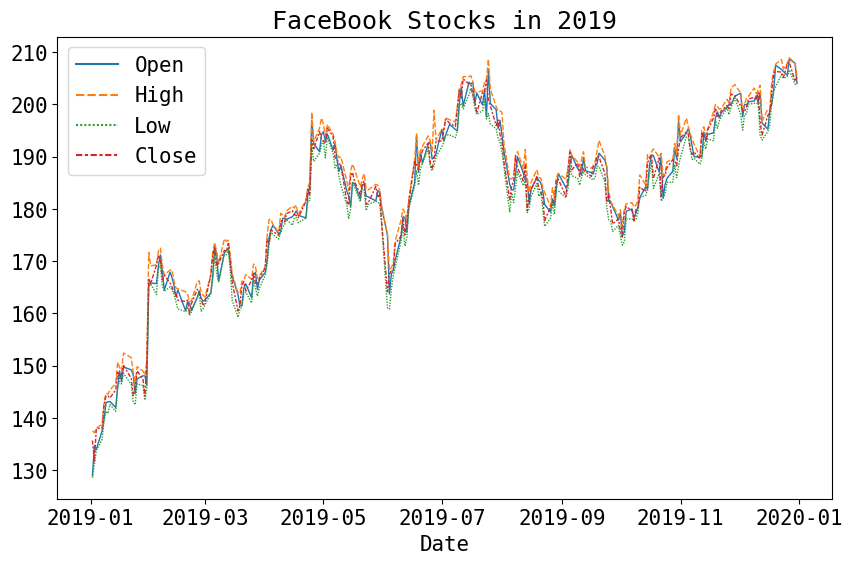

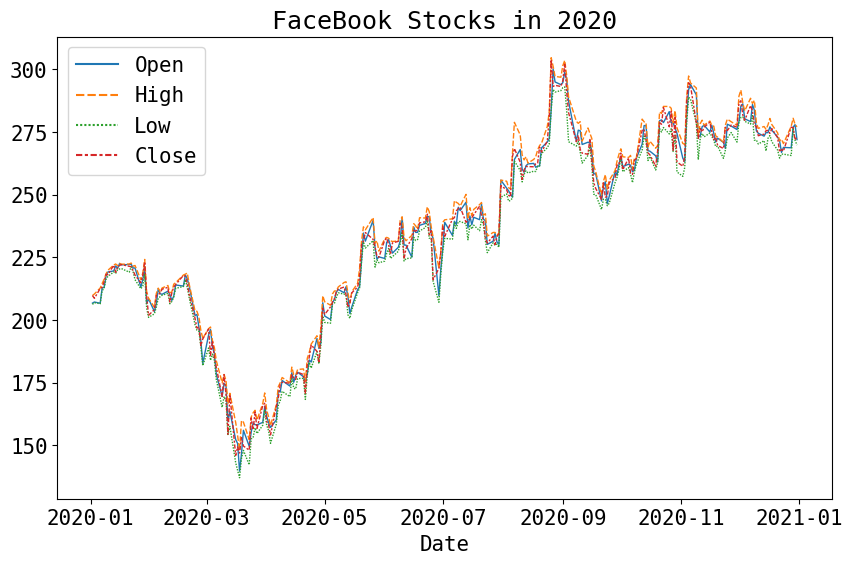

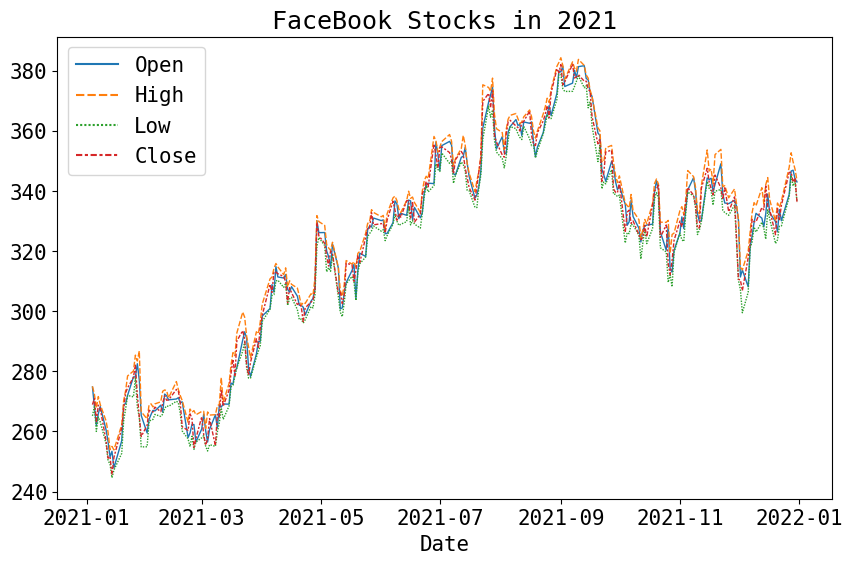

In [166]:
# FaceBook Stocks from 2013-2021
for year in range(2013,2022):
    plt.figure(figsize=(10,6))
    sns.lineplot(data=xdf.loc[f'{year}-01-01':f'{year}-12-31'],linewidth=1)
    plt.title(f'FaceBook Stocks in {year}')
    plt.show()
    print('\n')

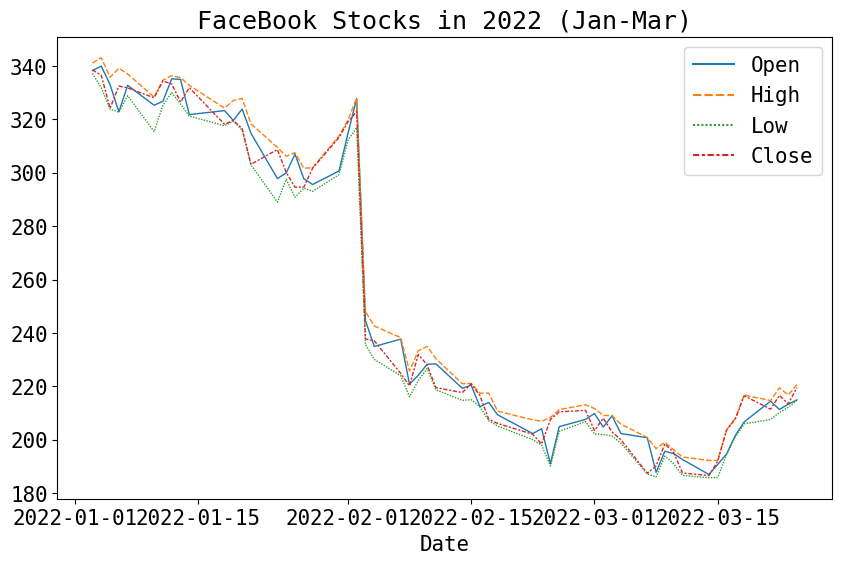

In [167]:
# FaceBook Current Year Stocks (2022 Jan-Mar)
plt.figure(figsize=(10,6))
sns.lineplot(data=xdf.loc['2022-01-01':],linewidth=1)
plt.title(f'FaceBook Stocks in 2022 (Jan-Mar)')
plt.show()

- Từ biểu đồ, ta thấy giá cổ phiếu của năm 2022 (từ tháng 1 đến tháng 3) biến động theo chiều hướng giảm

<a id="ana"></a>
<h5 style = "font-family:verdana; font-size:20px; background-color: white; color : RebeccaPurple;  text-align:left">Volume Analysis from 2012-2022(Mar)</h5>

In [168]:
volume = df_analysis['Volume']
volume

Date
2012-05-18    573576400
2012-05-21    168192700
2012-05-22    101786600
2012-05-23     73600000
2012-05-24     50237200
                ...    
2022-03-18     52055000
2022-03-21     30142300
2022-03-22     31998800
2022-03-23     23717300
2022-03-24     31466000
Name: Volume, Length: 2479, dtype: int64

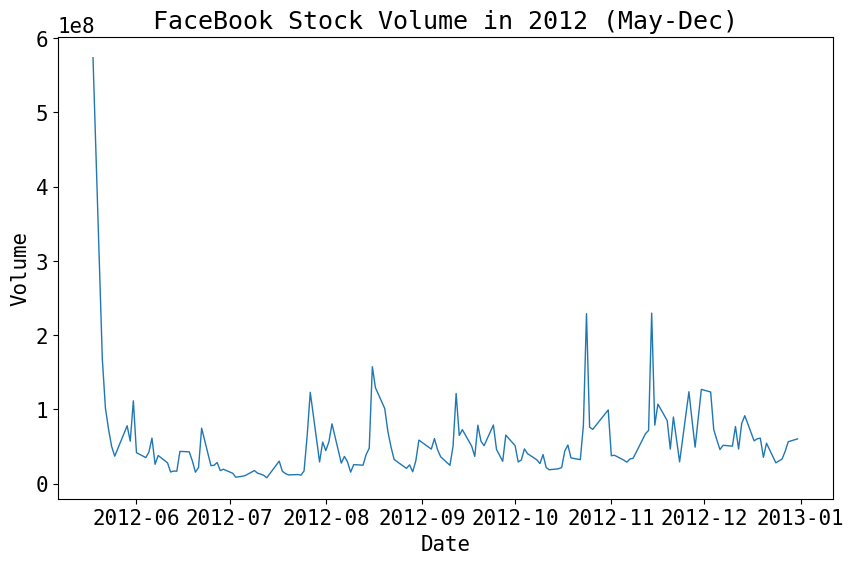

In [169]:
# FaceBook Stock Volume in 2012 (May-Dec)
plt.figure(figsize=(10,6))
sns.lineplot(data=volume.loc['2012-05-18':'2012-12-31'],linewidth=1)
plt.title('FaceBook Stock Volume in 2012 (May-Dec)')
plt.show()

- Từ biểu đồ, ta thấy lưu lượng giao dịch cổ phiếu của năm 2012 biến động theo chiều hướng giảm khi mà đầu năm cao hơn khá nhiều so với cuối năm

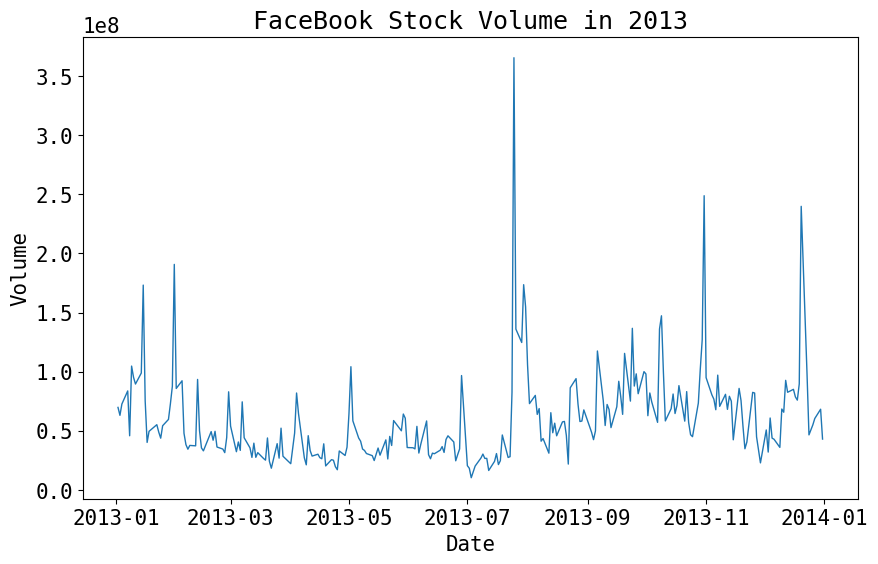

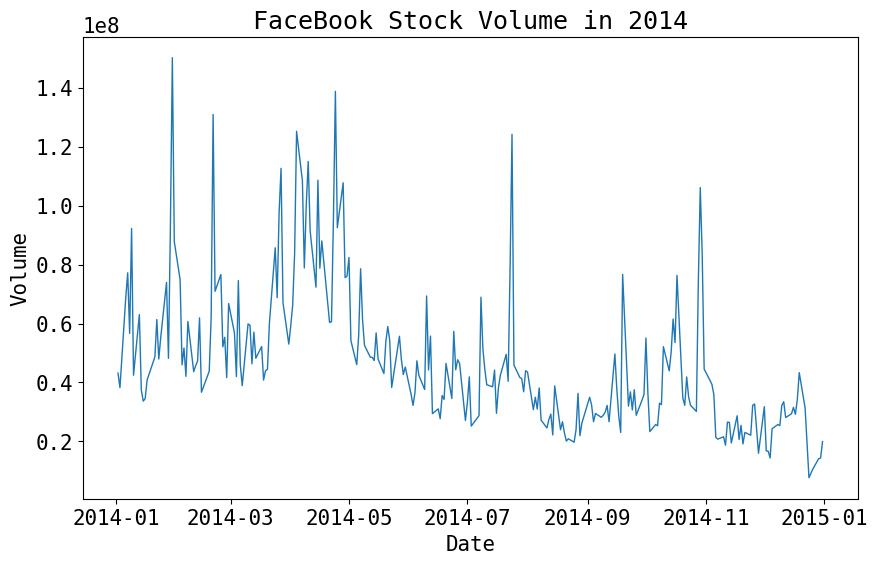

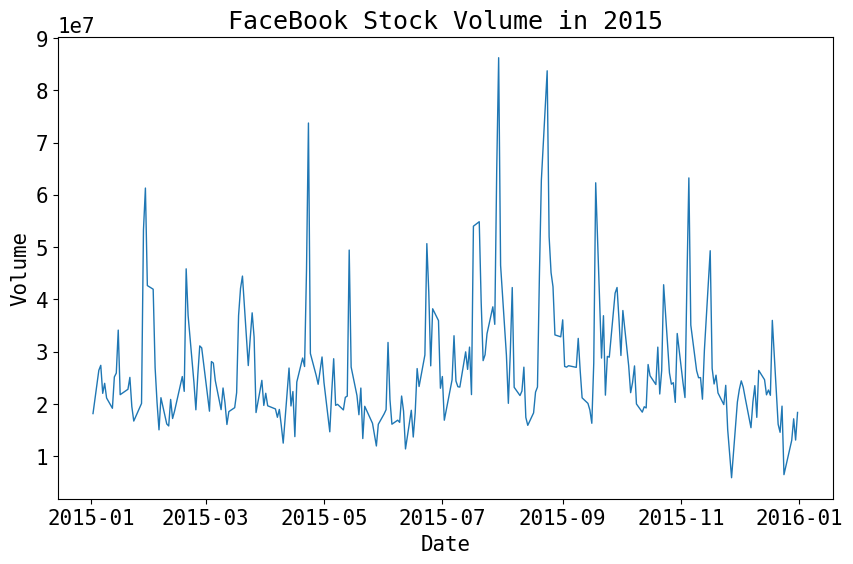

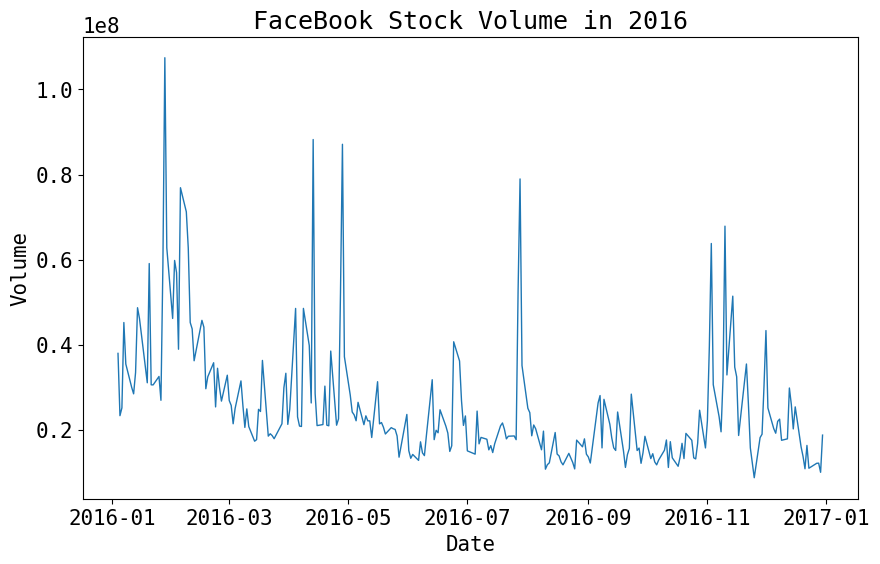

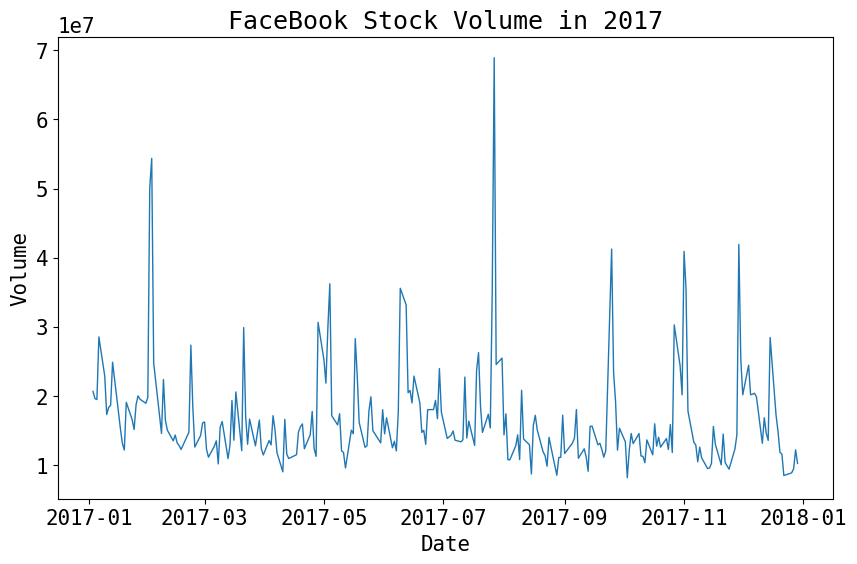

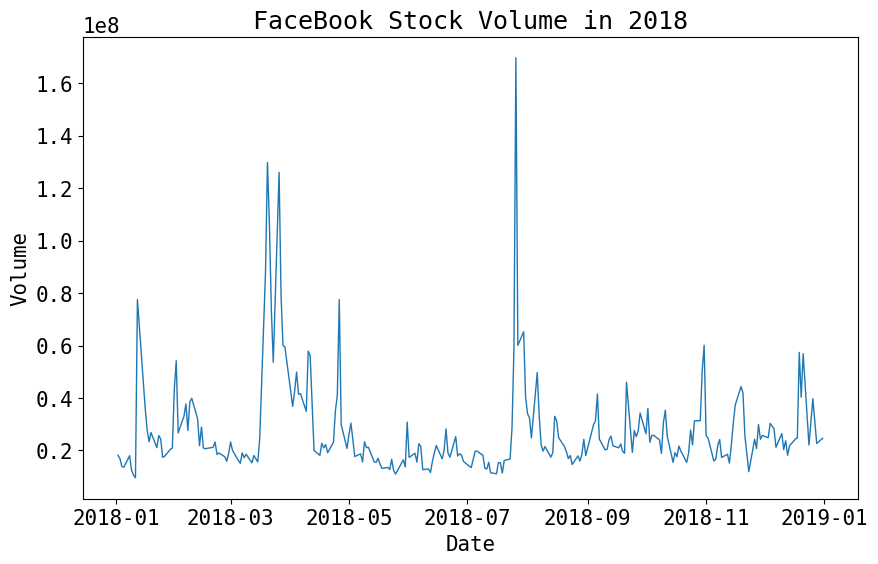

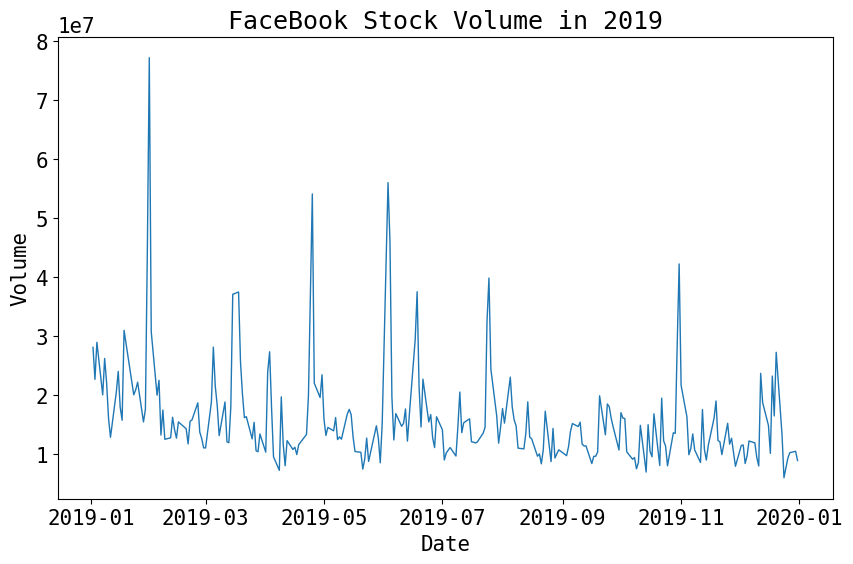

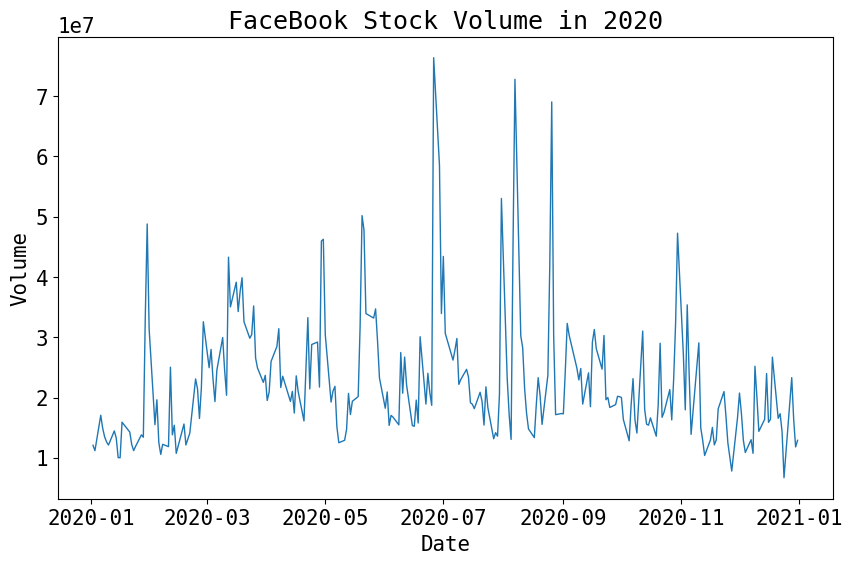

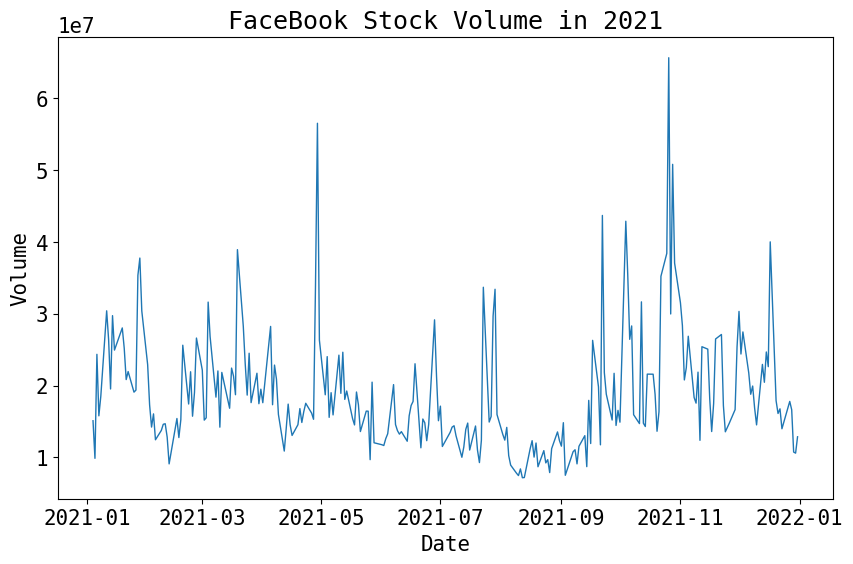

In [170]:
# FaceBook Stocks volume from 2013-2021
for year in range(2013,2022):
    plt.figure(figsize=(10,6))
    sns.lineplot(data=volume.loc[f'{year}-01-01':f'{year}-12-31'],linewidth=1)
    plt.title(f'FaceBook Stock Volume in {year}')
    plt.show()
    print('\n')

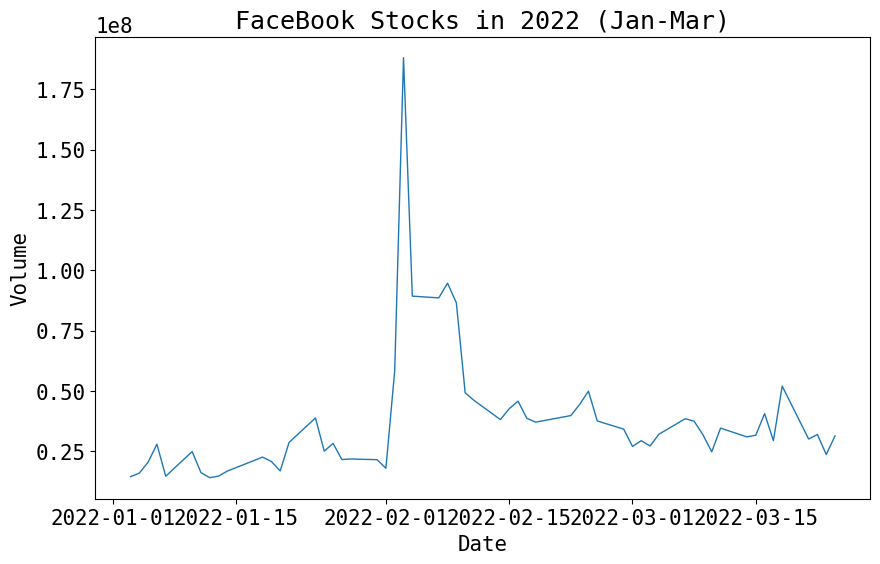

In [171]:
# FaceBook Current Year Stock Volume (2022 Jan-Mar)
plt.figure(figsize=(10,6))
sns.lineplot(data=volume.loc['2022-01-01':],linewidth=1)
plt.title(f'FaceBook Stocks in 2022 (Jan-Mar)')
plt.show()

- Từ biểu đồ, ta thấy giá cổ phiếu của năm 2022 tăng cao ở đầu tháng 2, còn lại giảm xuống mức khá thấp

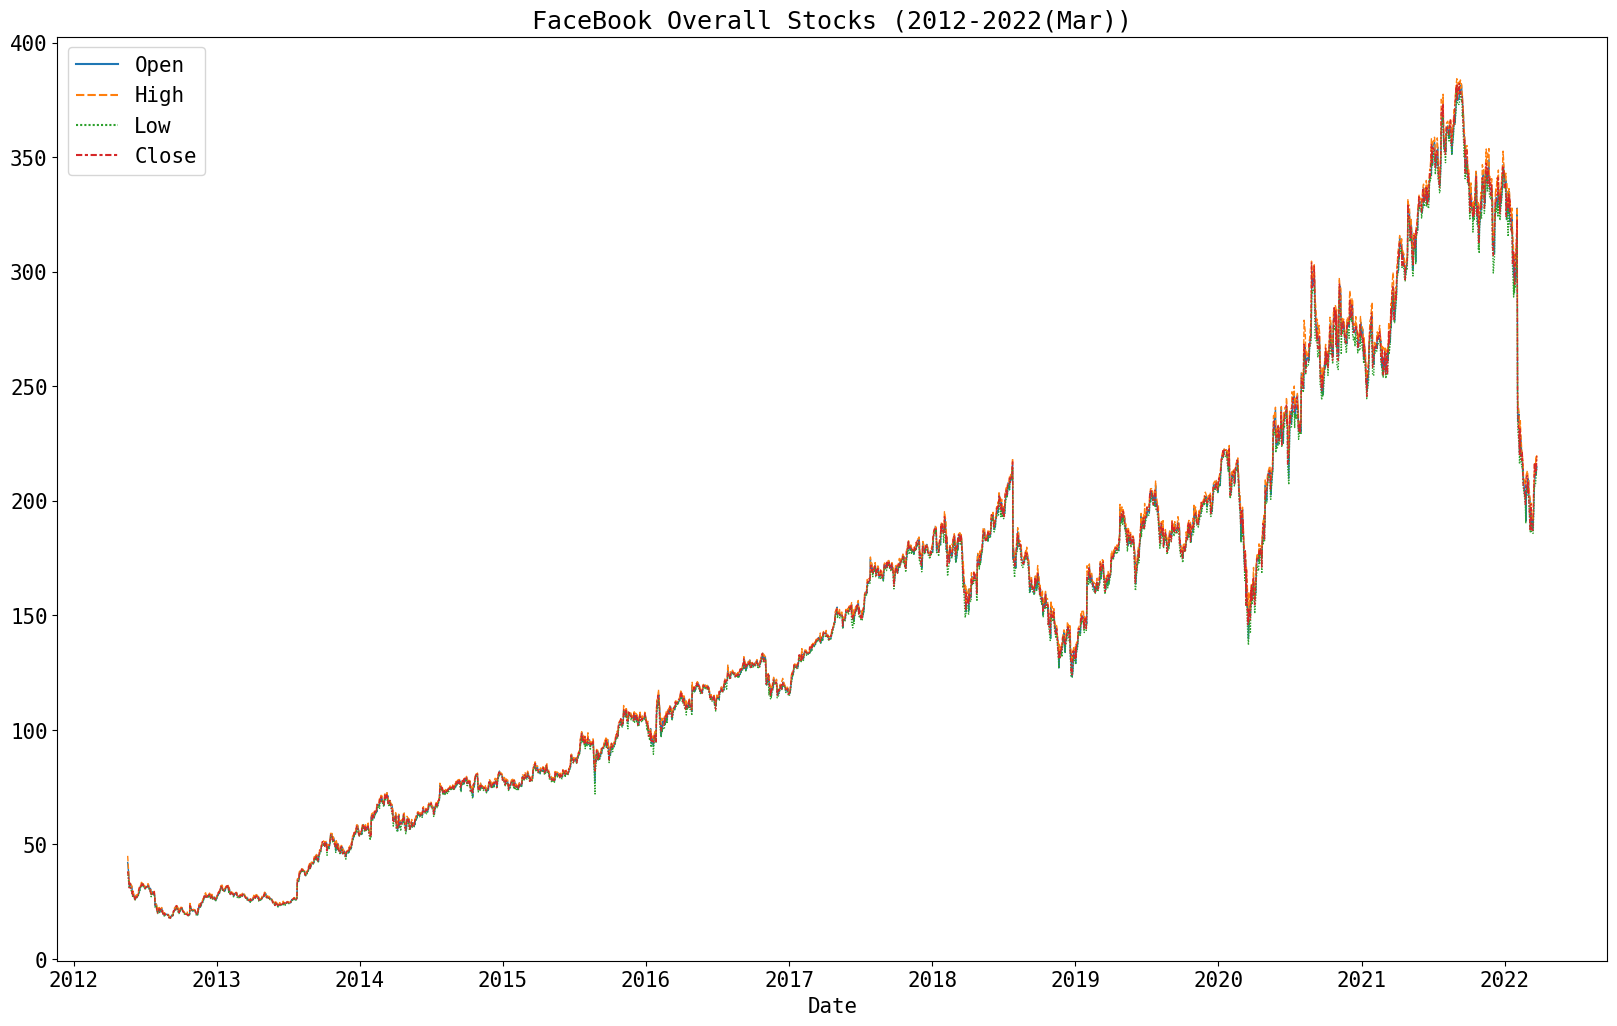

In [172]:
# Overall Analysis
plt.figure(figsize=(20,12))
sns.lineplot(data=xdf,linewidth=1)
plt.title(f'FaceBook Overall Stocks (2012-2022(Mar))')
plt.show()

- Tổng thể, giá cổ phiếu của Facebook có chiều hướng gia tăng đáng kể từ năm 2012 đến tháng 3 năm 2022

<a id="basic_ensemble"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           text-align: center;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;"> 2. Apply Models (basic models and models belong to Ensemble Learning)
</h1>
</div>

In [173]:
## Split date to 3 columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

## Drop Date column
df.drop('Date', axis=1, inplace=True)
df.head()

Open       High        Low      Close     Volume  Year  Month  Day
0  42.049999  45.000000  38.000000  38.230000  573576400  2012      5   18
1  36.529999  36.660000  33.000000  34.029999  168192700  2012      5   21
2  32.610001  33.590000  30.940001  31.000000  101786600  2012      5   22
3  31.370001  32.500000  31.360001  32.000000   73600000  2012      5   23
4  32.950001  33.209999  31.770000  33.029999   50237200  2012      5   24

In [174]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
norm_df = min_max_scaler.fit_transform(df)
norm_df

array([[0.06592409, 0.07302082, 0.05660743, ..., 0.        , 0.36363636,
        0.56666667],
       [0.05074257, 0.05023767, 0.04276699, ..., 0.        , 0.36363636,
        0.66666667],
       [0.0399615 , 0.04185106, 0.03706472, ..., 0.        , 0.36363636,
        0.7       ],
       ...,
       [0.53160066, 0.54960939, 0.53321706, ..., 1.        , 0.18181818,
        0.7       ],
       [0.53699121, 0.54234281, 0.53869791, ..., 1.        , 0.18181818,
        0.73333333],
       [0.54158417, 0.55291484, 0.54597795, ..., 1.        , 0.18181818,
        0.76666667]])

In [175]:
## Choosing Close column is label to predict
X, y = np.delete(norm_df, 3, 1), norm_df[:, 3]
print(f'The shape of attribute: {X.shape}')
print(f'The shape of label: {y.shape}')

The shape of attribute: (2479, 7)
The shape of label: (2479,)


In [176]:
## Split training and testing set with ratio 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=False)
print(f'The shape of training X: {X_train.shape}')
print(f'The shape of testing X: {X_test.shape}')
print(f'The shape of training y: {y_train.shape}')
print(f'The shape of testing y: {y_test.shape}')

The shape of training X: (1983, 7)
The shape of testing X: (496, 7)
The shape of training y: (1983,)
The shape of testing y: (496,)


In [177]:
import matplotlib.pyplot as plt

def actual_pred_plot(y_true, y_pred):
    df = pd.DataFrame({
        'y_true': y_true, 
        'y_pred': y_pred
    })
    
    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot predictions
    ax.plot(df.index, df['y_pred'], label='predictions')
    
    # Plot original values
    ax.plot(df.index, df['y_true'], label='original')
    
    # Set plot title and axis labels
    ax.set_title('Stock price Prediction')
    ax.set_ylabel('Standardized Price')
    ax.set_xlabel('Time')
    
    # Set plot background color
    ax.set_facecolor('#efefef')
    
    # Set gridlines
    ax.grid(color='lightgrey', linestyle='--')
    
    # Set legend
    ax.legend(loc='upper right')
    
    # Set font properties
    plt.rcParams['font.family'] = 'monospace'
    plt.rcParams['font.size'] = 15
    
    # Remove the rangeslider
    ax.set_xticks([])
    
    plt.show()
    
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

<div id="basic"></div>
<h5 style = "font-family:georgia; font-size:35px; background-color: white; color : RebeccaPurple; border-radius: 100px 100px; text-align:left;"> Basic models </h5>

<a id="knn"></a>
<h5 style = "font-family:verdana; font-size:20px; background-color: white; color : RebeccaPurple;  text-align:left">KNN</h5>

In [178]:
## Basic model
knn_reg_model = KNeighborsRegressor(n_neighbors=5)
knn_reg_model.fit(X_train, y_train)

KNeighborsRegressor()

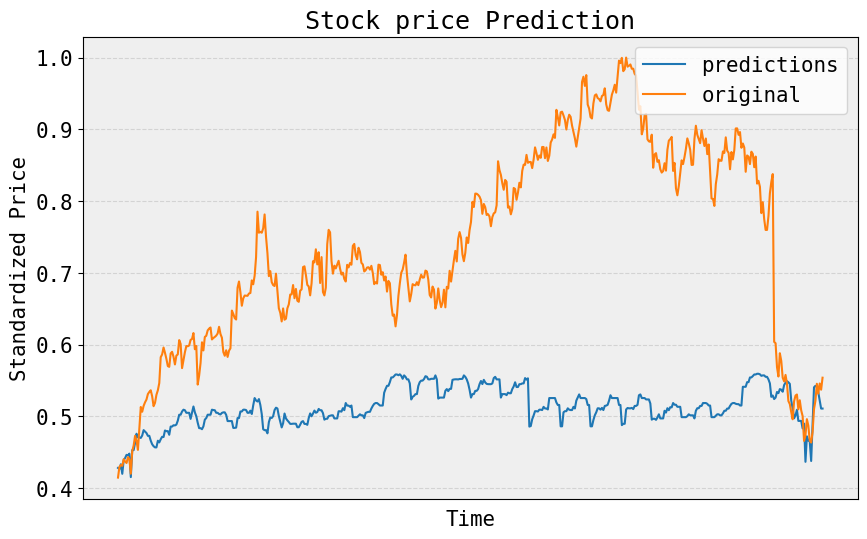

In [179]:
knn_reg_y_pred = knn_reg_model.predict(X_test)
actual_pred_plot(y_test, knn_reg_y_pred)

In [180]:
mae, mse, rmse, r_squared = evaluation(y_test, knn_reg_y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 0.22443119640745174
MSE: 0.06740973112793555
RMSE: 0.2596338404906717
R2 Score: -2.435693954220733


<a id="logistic"></a>
<h5 style = "font-family:verdana; font-size:20px; background-color: white; color : RebeccaPurple;  text-align:left">Linear Regression</h5>

In [181]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

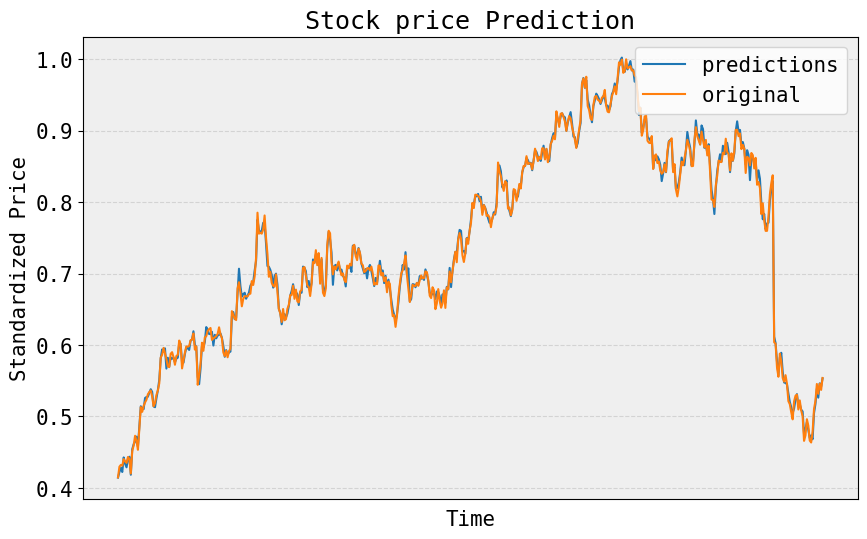

In [182]:
linear_reg_y_pred = linear_reg_model.predict(X_test)
actual_pred_plot(y_test, linear_reg_y_pred)

In [183]:
mae, mse, rmse, r_squared = evaluation(y_test, linear_reg_y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 0.004921806557168523
MSE: 4.029079791025732e-05
RMSE: 0.0063475032816263524
R2 Score: 0.9979464856412454


<a id="decision"></a>
<h5 style = "font-family:verdana; font-size:20px; background-color: white; color : RebeccaPurple;  text-align:left">Decision Tree</h5>

In [184]:
dcs_tree_reg_model = DecisionTreeRegressor()
dcs_tree_reg_model.fit(X_train, y_train)

DecisionTreeRegressor()

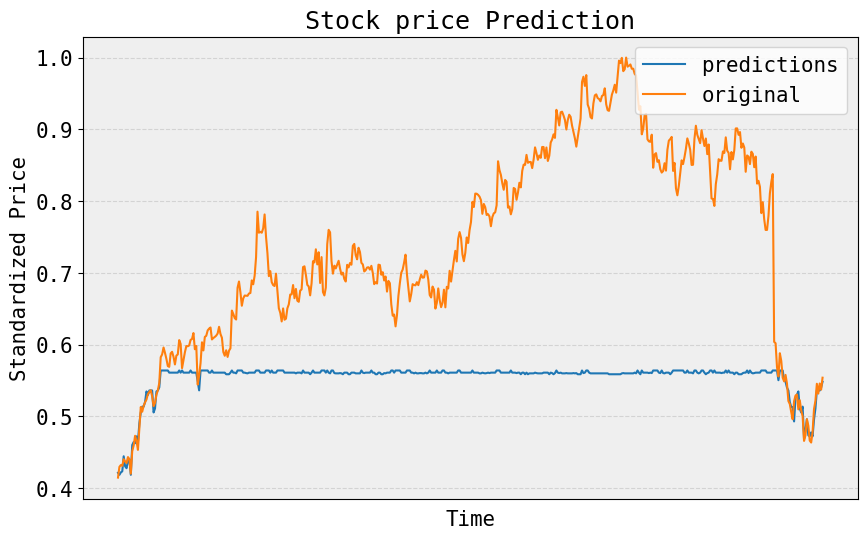

In [185]:
dcstree_reg_y_pred = dcs_tree_reg_model.predict(X_test)
actual_pred_plot(y_test, dcstree_reg_y_pred)

In [186]:
mae, mse, rmse, r_squared = evaluation(y_test, dcstree_reg_y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 0.1834239324105695
MSE: 0.049671976072065756
RMSE: 0.2228721069852972
R2 Score: -1.5316479539297592


<div id="ensemble"></div>
<h5 style = "font-family:georgia; font-size:35px; background-color: white; color : RebeccaPurple; border-radius: 100px 100px; text-align:left;"> Ensemble learning models </h5>

<a id="forest"></a>
<h5 style = "font-family:verdana; font-size:20px; background-color: white; color : RebeccaPurple;  text-align:left">Random Forest</h5>

In [187]:
rf_reg_model = RandomForestRegressor(n_estimators=500)
rf_reg_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

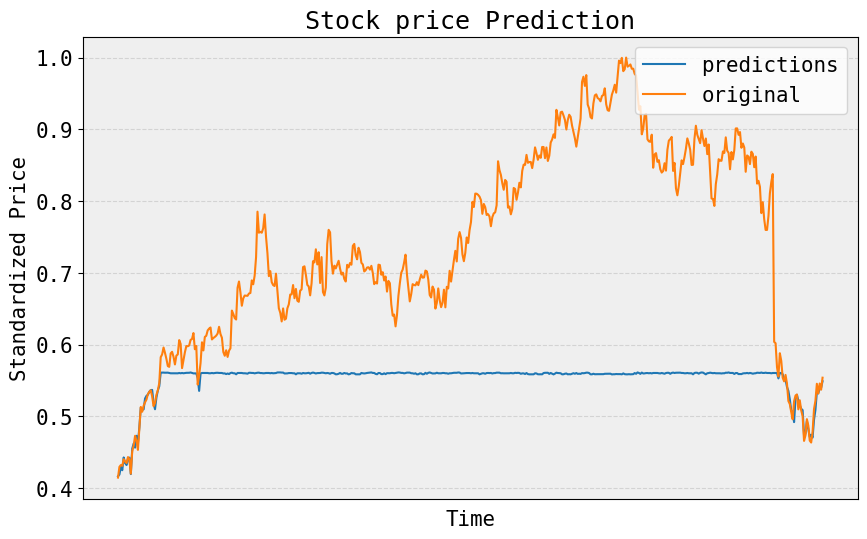

In [188]:
rf_reg_y_pred = rf_reg_model.predict(X_test)
actual_pred_plot(y_test, rf_reg_y_pred)

In [189]:
mae, mse, rmse, r_squared = evaluation(y_test, rf_reg_y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 0.1843135636569962
MSE: 0.050078254330810895
RMSE: 0.22378171134123293
R2 Score: -1.5523548716691709


<a id="boost"></a>
<h5 style = "font-family:verdana; font-size:20px; background-color: white; color : RebeccaPurple;  text-align:left">Gradient Boosting</h5>

In [190]:
gradient_boosting_model = GradientBoostingRegressor(
    n_estimators=3000, learning_rate=0.05,
    max_depth=4, max_features='sqrt',
    min_samples_leaf=15, min_samples_split=10, 
    loss='huber', random_state=5
)
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=3000,
                          random_state=5)

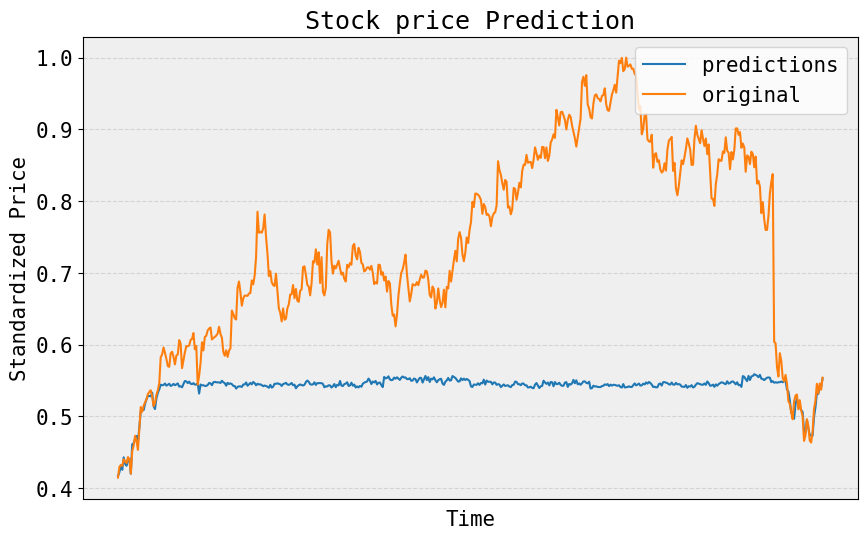

In [191]:
gradient_boosting_y_pred = gradient_boosting_model.predict(X_test)
actual_pred_plot(y_test, gradient_boosting_y_pred)

In [192]:
mae, mse, rmse, r_squared = evaluation(y_test, gradient_boosting_y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 0.19663754285520038
MSE: 0.05553458784677701
RMSE: 0.23565777697071025
R2 Score: -1.8304496179223273


<a id="neural_network"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           text-align: center;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;"> 3. Feed Forward Neural Network and Reccurent Neural Network
</h1>
</div>

<div id="mlp"></div>
<h5 style = "font-family:georgia; font-size:35px; background-color: white; color : RebeccaPurple; border-radius: 100px 100px; text-align:left;"> Feed Forward NN </h5>

In [193]:
path = os.getcwd()+"\\saved_models\\fnn_model.h5"
fnn_model = None
fnn_history = None
if os.path.isfile(path):
    fnn_model = tf.keras.models.load_model('./saved_models/fnn_model.h5')
else:
    ## FNN
    fnn_model = Sequential()
    fnn_model.add(Dense(units=512, activation='linear', input_shape=(7,)))
    fnn_model.add(Dense(units=512, activation='tanh'))
    fnn_model.add(Dense(units=512, activation='linear'))
    fnn_model.add(Dense(units=512, activation='tanh'))
    fnn_model.add(Dense(units=1))
    fnn_model.compile(optimizer='rmsprop', loss='mean_squared_error')
    fnn_model.summary()
    
    # Start training
    fnn_history = fnn_model.fit(X_train, y_train, epochs=500, batch_size=32)
    
    # Save model
    fnn_model.save('./saved_models/fnn_model.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               4096      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 1)                 513       
                                                                 
Total params: 792577 (3.02 MB)
Trainable params: 792577 (3.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
62/62 [=

62/62 [==============================] - 0s 6ms/step - loss: 5.5434e-05
Epoch 180/500
62/62 [==============================] - 0s 6ms/step - loss: 4.9153e-05
Epoch 181/500
62/62 [==============================] - 0s 6ms/step - loss: 5.5410e-05
Epoch 182/500
62/62 [==============================] - 0s 6ms/step - loss: 4.0544e-05
Epoch 183/500
62/62 [==============================] - 0s 6ms/step - loss: 5.2398e-05
Epoch 184/500
62/62 [==============================] - 0s 6ms/step - loss: 4.9640e-05
Epoch 185/500
62/62 [==============================] - 0s 6ms/step - loss: 4.6115e-05
Epoch 186/500
62/62 [==============================] - 0s 6ms/step - loss: 4.8066e-05
Epoch 187/500
62/62 [==============================] - 0s 6ms/step - loss: 5.2323e-05
Epoch 188/500
62/62 [==============================] - 0s 6ms/step - loss: 5.1008e-05
Epoch 189/500
62/62 [==============================] - 0s 6ms/step - loss: 4.6054e-05
Epoch 190/500
62/62 [==============================] - 0s 6ms/step -

62/62 [==============================] - 0s 6ms/step - loss: 3.3964e-05
Epoch 370/500
62/62 [==============================] - 0s 6ms/step - loss: 2.4144e-05
Epoch 371/500
62/62 [==============================] - 0s 6ms/step - loss: 2.9626e-05
Epoch 372/500
62/62 [==============================] - 0s 6ms/step - loss: 2.4985e-05
Epoch 373/500
62/62 [==============================] - 0s 6ms/step - loss: 2.5997e-05
Epoch 374/500
62/62 [==============================] - 0s 6ms/step - loss: 2.8276e-05
Epoch 375/500
62/62 [==============================] - 0s 6ms/step - loss: 2.5215e-05
Epoch 376/500
62/62 [==============================] - 0s 6ms/step - loss: 2.3957e-05
Epoch 377/500
62/62 [==============================] - 0s 6ms/step - loss: 2.9275e-05
Epoch 378/500
62/62 [==============================] - 0s 6ms/step - loss: 2.6165e-05
Epoch 379/500
62/62 [==============================] - 0s 6ms/step - loss: 2.5878e-05
Epoch 380/500
62/62 [==============================] - 0s 6ms/step -

C:\Users\HP\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



16/16 [==============================] - 0s 2ms/step


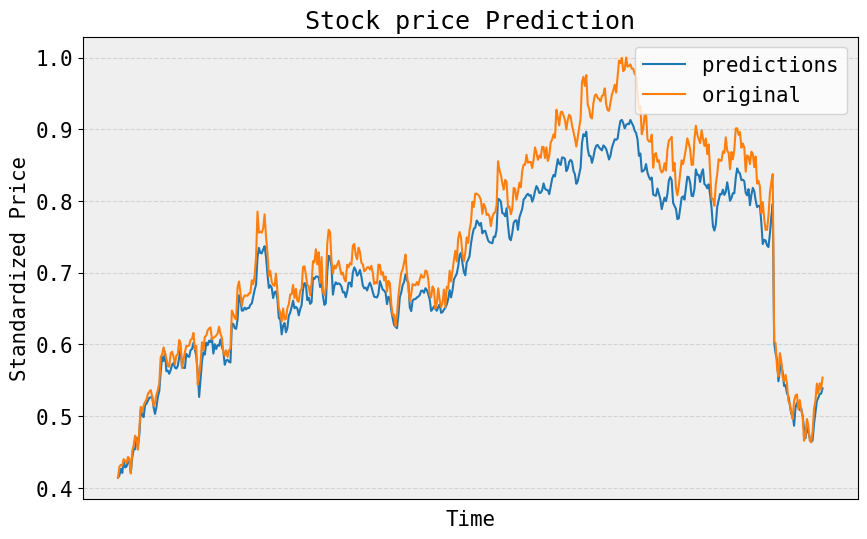

In [194]:
fnn_y_pred = fnn_model.predict(X_test)
actual_pred_plot(y_test, fnn_y_pred.flatten())

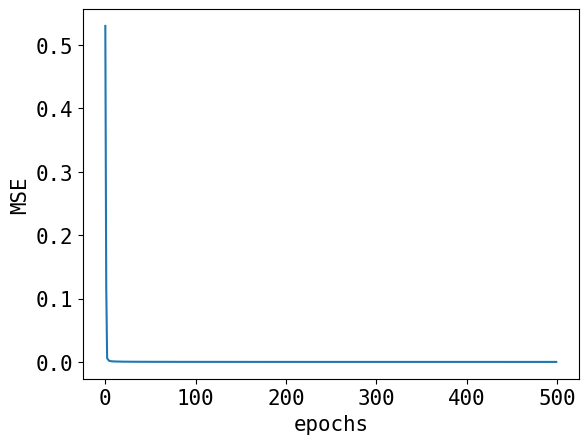

In [195]:
if fnn_history != None:
    # plot mse
    plt.plot(fnn_history.history['loss'])
    plt.xlabel('epochs')
    plt.ylabel('MSE')
    plt.savefig('images/fnn_model.png')
else:
    image = mpimg.imread(os.getcwd()+'\\images\\fnn_model.png')
    plt.imshow(image)
    plt.show()

In [196]:
mae, mse, rmse, r_squared = evaluation(y_test, fnn_y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 0.03284955211342096
MSE: 0.0015532962437535955
RMSE: 0.03941187947502118
R2 Score: 0.9208326390792201


<div id="rnn"></div>
<h5 style = "font-family:georgia; font-size:35px; background-color: white; color : RebeccaPurple; border-radius: 100px 100px; text-align:left;"> Recurrent NN </h5>

In [197]:
## Prepare data for RNN
rnn_X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
rnn_X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(f'The shape of training X: {rnn_X_train.shape}')
print(f'The shape of testing X: {rnn_X_test.shape}')

The shape of training X: (1983, 7, 1)
The shape of testing X: (496, 7, 1)


In [198]:
path = os.getcwd()+"\\saved_models\\rnn_model.h5"
rnn_model = None
rnn_history = None
if os.path.isfile(path):
    rnn_model = tf.keras.models.load_model('./saved_models/rnn_model.h5')
else:
    ## RNN
    rnn_model = Sequential()
    rnn_model.add(SimpleRNN(units=256, activation='linear', input_shape=rnn_X_train.shape[1:], return_sequences=True))
    rnn_model.add(SimpleRNN(units=256, activation='tanh', return_sequences=True))
    rnn_model.add(SimpleRNN(units=256, activation='tanh', return_sequences=True))
    rnn_model.add(SimpleRNN(units=256, activation='linear', return_sequences=False))
    rnn_model.add(Dense(units=1))
    rnn_model.compile(optimizer='rmsprop', loss='mean_squared_error')
    rnn_model.summary()
    
    ## Start training
    rnn_history = rnn_model.fit(rnn_X_train, y_train, epochs=300, batch_size=32)
    
    ## Save model to reuse
    rnn_model.save('./saved_models/rnn_model.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 7, 256)            66048     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 7, 256)            131328    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 7, 256)            131328    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 460289 (1.76 MB)
Trainable params: 460289 (1.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/300
62/62 

62/62 [==============================] - 2s 30ms/step - loss: 8.2479e-05
Epoch 179/300
62/62 [==============================] - 2s 31ms/step - loss: 9.1589e-05
Epoch 180/300
62/62 [==============================] - 2s 31ms/step - loss: 6.5615e-05
Epoch 181/300
62/62 [==============================] - 2s 31ms/step - loss: 7.1798e-05
Epoch 182/300
62/62 [==============================] - 2s 31ms/step - loss: 6.8197e-05
Epoch 183/300
62/62 [==============================] - 2s 31ms/step - loss: 7.7173e-05
Epoch 184/300
62/62 [==============================] - 2s 32ms/step - loss: 6.4569e-05
Epoch 185/300
62/62 [==============================] - 2s 31ms/step - loss: 6.9280e-05
Epoch 186/300
62/62 [==============================] - 2s 30ms/step - loss: 5.8841e-05
Epoch 187/300
62/62 [==============================] - 2s 30ms/step - loss: 7.8390e-05
Epoch 188/300
62/62 [==============================] - 2s 30ms/step - loss: 8.5333e-05
Epoch 189/300
62/62 [==============================] - 2s

C:\Users\HP\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



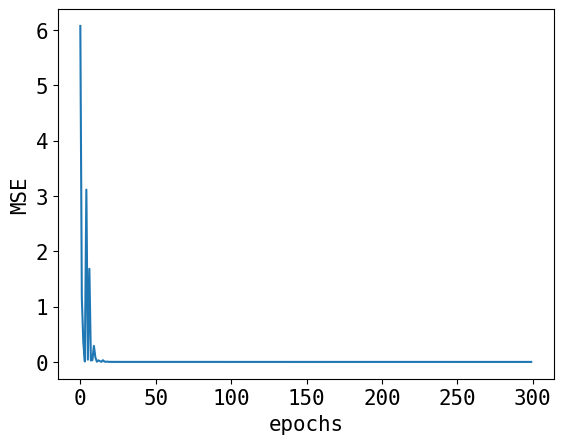

In [199]:
if rnn_history != None:
    ## Plot mse
    plt.plot(rnn_history.history['loss'])
    plt.xlabel('epochs')
    plt.ylabel('MSE')
    plt.savefig('images/rnn_model.png')
else:
    image = mpimg.imread(os.getcwd()+'\\images\\rnn_model.png')
    plt.imshow(image)
    plt.show()

16/16 [==============================] - 0s 7ms/step


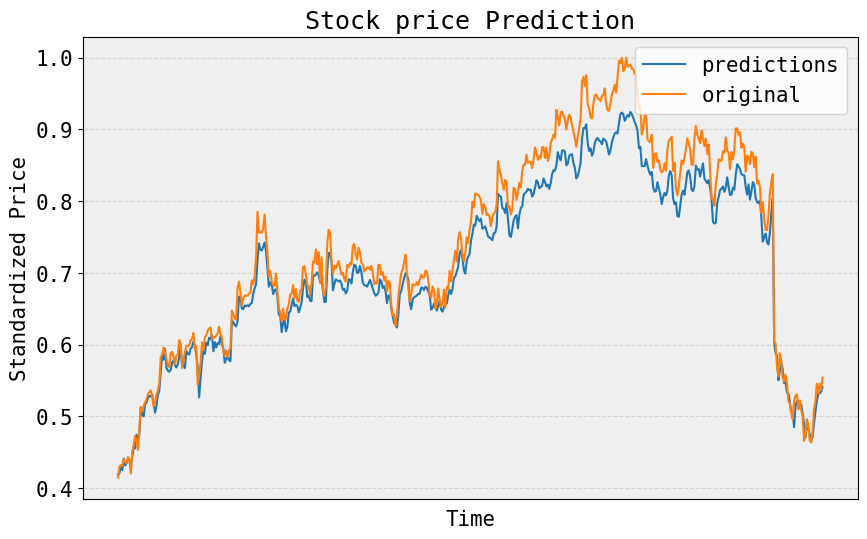

In [200]:
rnn_y_pred = rnn_model.predict(rnn_X_test)
actual_pred_plot(y_test, rnn_y_pred.flatten())

In [201]:
mae, mse, rmse, r_squared = evaluation(y_test, rnn_y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 0.028473437353749496
MSE: 0.0011984844365122691
RMSE: 0.034619133965370495
R2 Score: 0.9389164492447227


<a id="overfitting"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           text-align: center;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;"> 4. Avoid Overfitting
</h1>
</div>

<div id="more_data"></div>
<h5 style = "font-family:georgia; font-size:35px; background-color: white; color : RebeccaPurple; border-radius: 100px 100px; text-align:left;"> Add more data </h5>

In [202]:
## Read data
of_df = pd.read_csv('FB_more.csv')
of_df = of_df.drop('Adj Close', axis=1)

## Converting datatype
of_df['Date'] = pd.to_datetime(of_df['Date'])

## Split date to 3 columns
of_df['Year'] = of_df['Date'].dt.year
of_df['Month'] = of_df['Date'].dt.month
of_df['Day'] = of_df['Date'].dt.day

## Drop Date column
of_df.drop('Date', axis=1, inplace=True)
of_df.head()

min_max_scaler = MinMaxScaler(feature_range=(0, 1))
of_norm_df = min_max_scaler.fit_transform(of_df)
of_norm_df

## Choosing Close column is label to predict
of_X, of_y = np.delete(of_norm_df, 3, 1), of_norm_df[:, 3]
print(f'The shape of attribute: {of_X.shape}')
print(f'The shape of label: {of_y.shape}')

## Split training and testing set with ratio 8:2
of_X_train, of_X_test, of_y_train, of_y_test = train_test_split(of_X, of_y, train_size=0.8, random_state=0, shuffle=False)
print(f'The shape of training X: {of_X_train.shape}')
print(f'The shape of testing X: {of_X_test.shape}')
print(f'The shape of training y: {of_y_train.shape}')
print(f'The shape of testing y: {of_y_test.shape}')

The shape of attribute: (2917, 7)
The shape of label: (2917,)
The shape of training X: (2333, 7)
The shape of testing X: (584, 7)
The shape of training y: (2333,)
The shape of testing y: (584,)


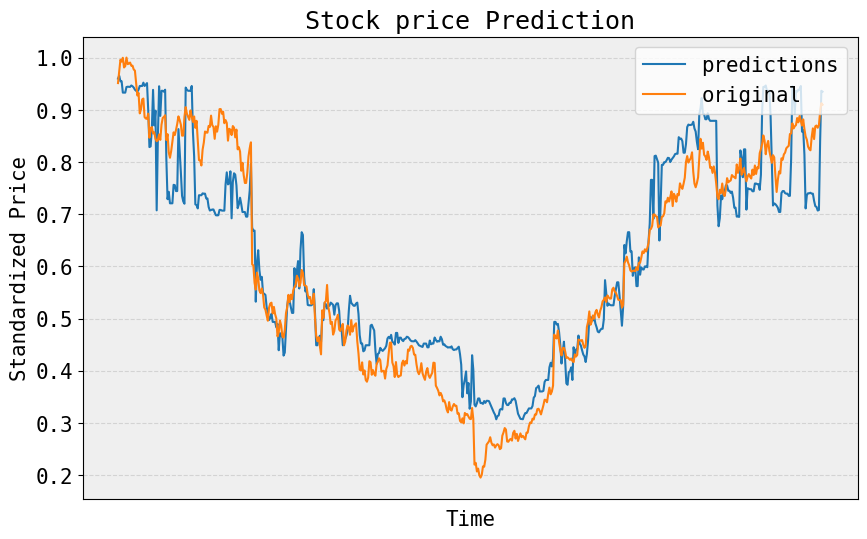

In [203]:
#KNN
of_knn_reg_model = KNeighborsRegressor(n_neighbors=5)
of_knn_reg_model.fit(of_X_train, of_y_train)
of_knn_reg_y_pred = of_knn_reg_model.predict(of_X_test)
actual_pred_plot(of_y_test, of_knn_reg_y_pred)

In [204]:
mae, mse, rmse, r_squared = evaluation(of_y_test, of_knn_reg_y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 0.05707514022595116
MSE: 0.004883059887725965
RMSE: 0.06987889443691826
R2 Score: 0.8968362775313243


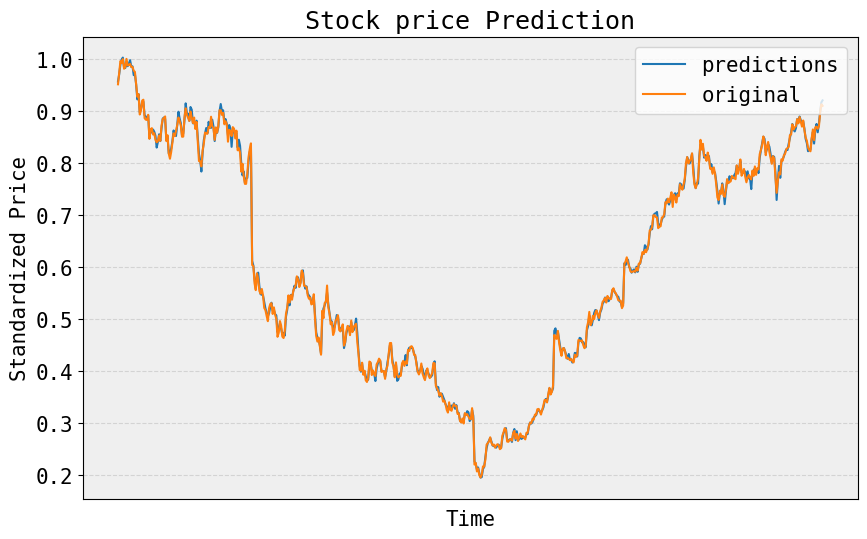

In [205]:
#Linear
of_linear_reg_model = LinearRegression()
of_linear_reg_model.fit(of_X_train, of_y_train)
of_linear_reg_y_pred = linear_reg_model.predict(of_X_test)
actual_pred_plot(of_y_test, of_linear_reg_y_pred)

In [206]:
mae, mse, rmse, r_squared = evaluation(of_y_test, of_linear_reg_y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 0.004560119210915704
MSE: 3.39852539724015e-05
RMSE: 0.0058296872962794065
R2 Score: 0.9992819982983111


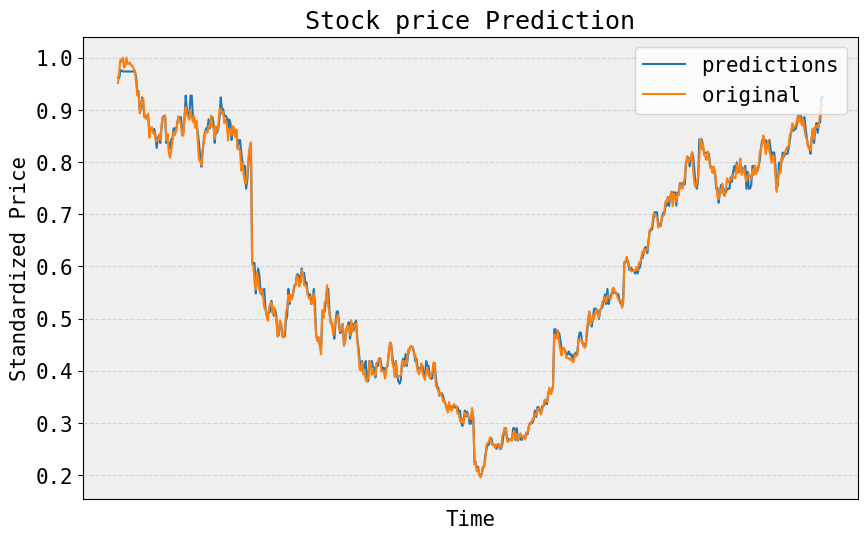

In [207]:
#Decision Tree
of_dcs_tree_reg_model = DecisionTreeRegressor()
of_dcs_tree_reg_model.fit(of_X_train, of_y_train)
of_dcstree_reg_y_pred = of_dcs_tree_reg_model.predict(of_X_test)
actual_pred_plot(of_y_test, of_dcstree_reg_y_pred)

In [208]:
mae, mse, rmse, r_squared = evaluation(of_y_test, of_dcstree_reg_y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 0.007668010655702002
MSE: 0.00010649402980189858
RMSE: 0.010319594459178063
R2 Score: 0.997750115544831


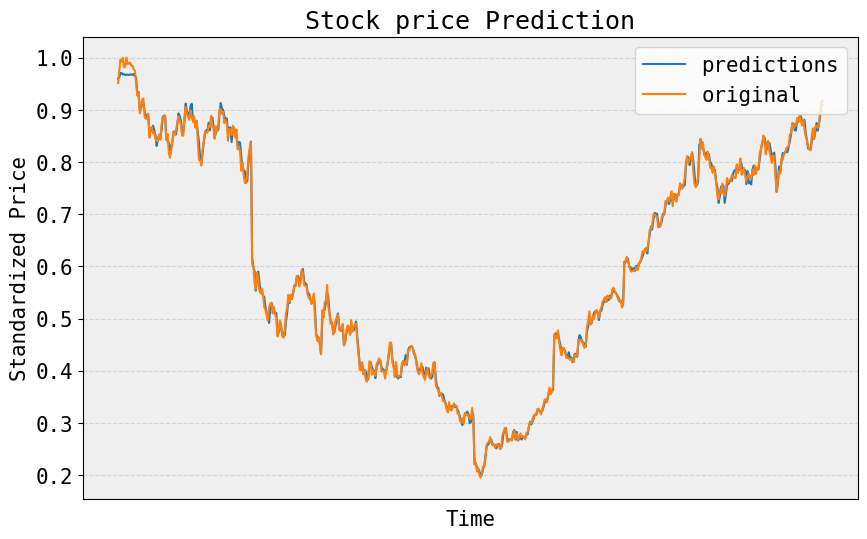

In [209]:
#Random Forest
of_rf_reg_model = RandomForestRegressor(n_estimators=500)
of_rf_reg_model.fit(of_X_train, of_y_train)
of_rf_reg_y_pred = of_rf_reg_model.predict(of_X_test)
actual_pred_plot(of_y_test, of_rf_reg_y_pred)

In [210]:
mae, mse, rmse, r_squared = evaluation(of_y_test, of_rf_reg_y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 0.006443064630261342
MSE: 7.169478601158009e-05
RMSE: 0.008467277367110403
R2 Score: 0.9984853142954193


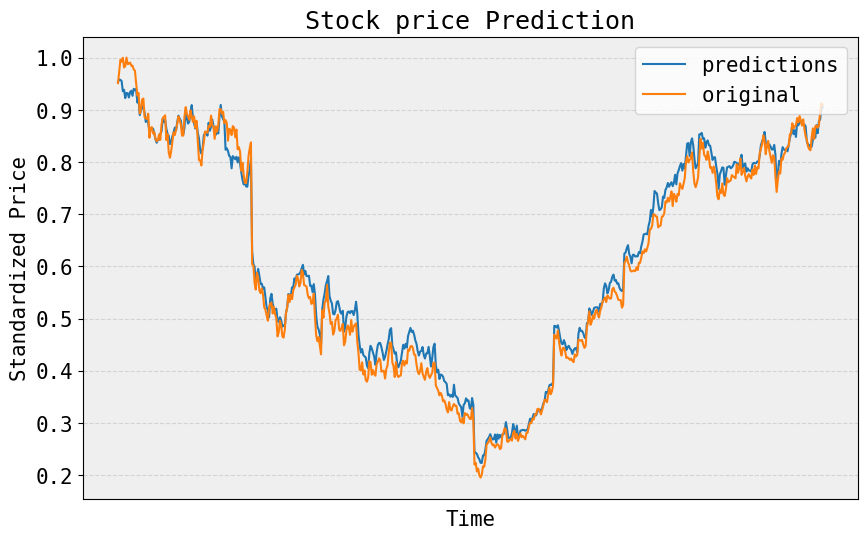

In [211]:
#Gradient Boosting
of_gradient_boosting_model = GradientBoostingRegressor(
    n_estimators=3000, learning_rate=0.05,
    max_depth=4, max_features='sqrt',
    min_samples_leaf=15, min_samples_split=10, 
    loss='huber', random_state=5
)
of_gradient_boosting_model.fit(of_X_train, of_y_train)
of_gradient_boosting_y_pred = of_gradient_boosting_model.predict(of_X_test)
actual_pred_plot(of_y_test, of_gradient_boosting_y_pred)

In [212]:
mae, mse, rmse, r_squared = evaluation(of_y_test, of_gradient_boosting_y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 0.021197832203043356
MSE: 0.0006445467989021571
RMSE: 0.025387926242648434
R2 Score: 0.9863827500360678


<div id="early_stopping"></div>
<h5 style = "font-family:georgia; font-size:35px; background-color: white; color : RebeccaPurple; border-radius: 100px 100px; text-align:left;"> Early Stopping </h5>

In [234]:
path = os.getcwd()+"\\saved_models\\es_fnn_model.h5"
es_fnn_model = None
es_fnn_history = None
if os.path.isfile(path):
    es_fnn_model = tf.keras.models.load_model('./saved_models/es_fnn_model.h5')
else:
    ## FNN
    es_fnn_model = Sequential()
    es_fnn_model.add(Dense(units=512, activation='linear', input_shape=(7,)))
    es_fnn_model.add(Dense(units=512, activation='tanh'))
    es_fnn_model.add(Dense(units=512, activation='linear'))
    es_fnn_model.add(Dense(units=512, activation='tanh'))
    es_fnn_model.add(Dense(units=1))
    es_fnn_model.compile(optimizer='rmsprop', loss='mean_squared_error')
    es_fnn_model.summary()
    
    # Early stopping
    early_stopping = EarlyStopping(monitor='loss', patience=50, restore_best_weights=True)
    
    # Start training
    es_fnn_history = es_fnn_model.fit(X_train, y_train, epochs=500, batch_size=32, callbacks=[early_stopping])
    
    # Save model
    es_fnn_model.save('./saved_models/es_fnn_model.h5')

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 512)               4096      
                                                                 
 dense_23 (Dense)            (None, 512)               262656    
                                                                 
 dense_24 (Dense)            (None, 512)               262656    
                                                                 
 dense_25 (Dense)            (None, 512)               262656    
                                                                 
 dense_26 (Dense)            (None, 1)                 513       
                                                                 
Total params: 792577 (3.02 MB)
Trainable params: 792577 (3.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
62/62 

62/62 [==============================] - 0s 6ms/step - loss: 5.0364e-05
Epoch 180/500
62/62 [==============================] - 0s 6ms/step - loss: 5.1432e-05
Epoch 181/500
62/62 [==============================] - 0s 6ms/step - loss: 5.2308e-05
Epoch 182/500
62/62 [==============================] - 0s 6ms/step - loss: 5.1094e-05
Epoch 183/500
62/62 [==============================] - 0s 6ms/step - loss: 4.4211e-05
Epoch 184/500
62/62 [==============================] - 0s 6ms/step - loss: 5.1555e-05
Epoch 185/500
62/62 [==============================] - 0s 6ms/step - loss: 4.6898e-05
Epoch 186/500
62/62 [==============================] - 0s 6ms/step - loss: 5.6772e-05
Epoch 187/500
62/62 [==============================] - 0s 6ms/step - loss: 5.2488e-05
Epoch 188/500
62/62 [==============================] - 0s 6ms/step - loss: 4.6206e-05
Epoch 189/500
62/62 [==============================] - 0s 6ms/step - loss: 4.8552e-05
Epoch 190/500
62/62 [==============================] - 0s 6ms/step -

62/62 [==============================] - 0s 6ms/step - loss: 2.4369e-05
Epoch 370/500
62/62 [==============================] - 0s 6ms/step - loss: 3.2101e-05
Epoch 371/500
62/62 [==============================] - 0s 6ms/step - loss: 2.7062e-05
Epoch 372/500
62/62 [==============================] - 0s 6ms/step - loss: 2.9228e-05
Epoch 373/500
62/62 [==============================] - 0s 6ms/step - loss: 2.7861e-05
Epoch 374/500
62/62 [==============================] - 0s 7ms/step - loss: 2.8226e-05
Epoch 375/500
62/62 [==============================] - 0s 7ms/step - loss: 2.7535e-05
Epoch 376/500
62/62 [==============================] - 0s 6ms/step - loss: 3.0623e-05
Epoch 377/500
62/62 [==============================] - 0s 6ms/step - loss: 2.6322e-05
Epoch 378/500
62/62 [==============================] - 0s 6ms/step - loss: 2.5398e-05
Epoch 379/500
62/62 [==============================] - 0s 6ms/step - loss: 3.0289e-05
Epoch 380/500
62/62 [==============================] - 0s 6ms/step -

C:\Users\HP\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



16/16 [==============================] - 0s 2ms/step


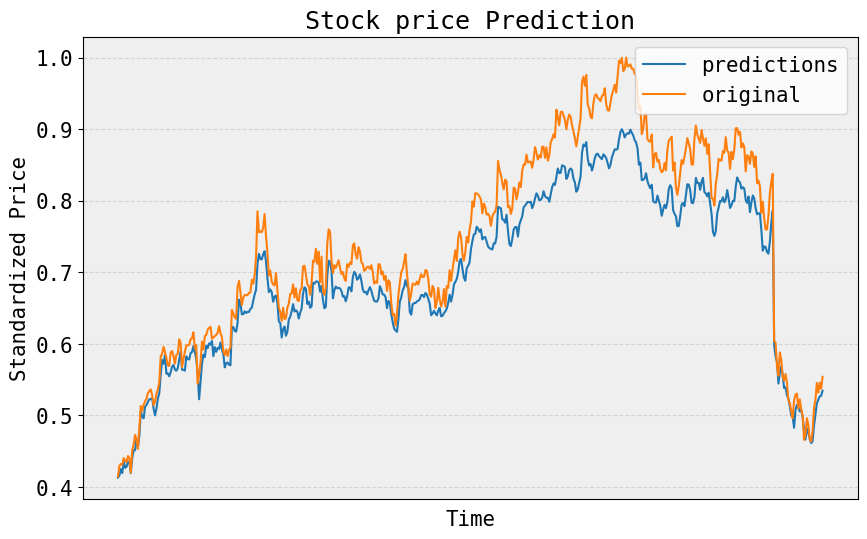

In [235]:
es_fnn_y_pred = es_fnn_model.predict(X_test)
actual_pred_plot(y_test, es_fnn_y_pred.flatten())

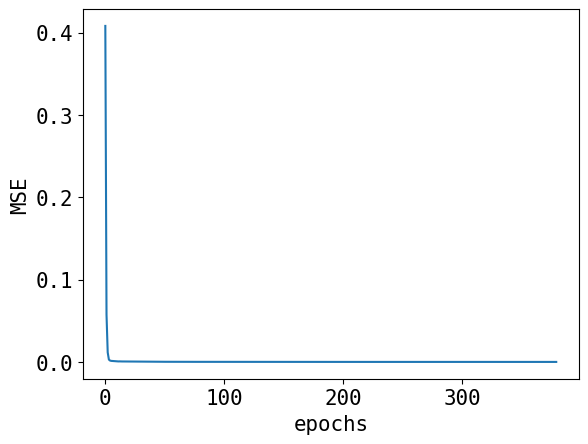

In [236]:
if es_fnn_history != None:
    # plot mse
    plt.plot(es_fnn_history.history['loss'])
    plt.xlabel('epochs')
    plt.ylabel('MSE')
    plt.savefig('images/es_fnn_model.png')
else:
    image = mpimg.imread(os.getcwd()+'\\images\\es_fnn_model.png')
    plt.imshow(image)
    plt.show()

In [237]:
mae, mse, rmse, r_squared = evaluation(y_test, es_fnn_y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 0.04066667986839007
MSE: 0.0022784443426972713
RMSE: 0.04773305293711341
R2 Score: 0.8838737772388267


<a id="optimize"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           text-align: center;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;"> 5. Optimize performance
</h1>
</div>

- Do bộ data có độ tương quan rất cao, nên phương pháp feature selection sử dụng correlation không khả thi.
- Số lượng data mặc dù được tổng hợp từ năm 2012-2022 (tập FB.csv - 2479 dòng) và 2012-2023 (tập FB_more - 2917 dòng) tuy nhiên vẫn còn khá ít (khoảng 2-3k dòng) nên chưa đủ để bao quát dữ liệu và phát huy hết sức mạnh của RNN khi mà kết quả thực nghiệm cho thấy Feed Forward NN trội hơn RNN.
- Basic models và models thuộc ensemble learning ban đầu cho kết quả tệ trên tập FB.csv, và kết quả rất tốt trên tập FB_more với nhiều data hơn.

## Improved RNN model by data
* Sử dụng Dropout: Dropout là một kỹ thuật chỉnh regularize mô hình bằng cách ngẫu nhiên "tắt" một số lượng nơ-ron trong quá trình huấn luyện. Điều này giúp mô hình trở nên chống overfitting hơn. Áp dụng với RNN nhằm giảm sự phụ thuộc quá mức vào các thông tin trước đó trong chuỗi đầu vào, làm cho mô hình tổng quát hóa tốt hơn.
* Sử dụng weight decay: Còn được gọi là L2 regularization là một phương pháp regularize bằng cách thêm một thành phần kiểm soát vào hàm mất mát, phụ thuộc vào trọng số của các tham số trong mô hình. Nó giúp giảm sự phức tạp của mô hình và ngăn chặn các trọng số trở nên quá lớn, sử dụng với RNN nhằm giúp kiểm soát trọng số của các tham số trong mô hình RNN, giảm nguy cơ overfitting
#### Tóm lại, lựa chọn giá trị cụ thể cho dropout và weight decay giúp phần nào tinh chỉnh hyperparameters trong quá trình huấn luyện mô hình.

In [213]:
# use 30 days before to predict next day
enhanced_X_train= []
enhanced_X_test= []
enhanced_y_train = []
enhanced_y_test = []

for i in range(30, len(X_train)):
    enhanced_X_train.append(X_train[i-7: i, :])
    enhanced_y_train.append(y_train[i])
for i in range(30, len(X_test)):
    enhanced_X_test.append(X_test[i-7: i, :])
    enhanced_y_test.append(y_test[i])

enhanced_X_train, enhanced_y_train = np.array(enhanced_X_train), np.array(enhanced_y_train)
enhanced_X_test, enhanced_y_test = np.array(enhanced_X_test), np.array(enhanced_y_test)

print(f'X train shape : {enhanced_X_train.shape}')
print(f'Y train shape : {enhanced_y_train.shape}')
print(f'X test shape : {enhanced_X_test.shape}')
print(f'Y test shape : {enhanced_y_test.shape}')

X train shape : (1953, 7, 7)
Y train shape : (1953,)
X test shape : (466, 7, 7)
Y test shape : (466,)


In [214]:
path = os.getcwd()+"\\saved_models\\improved_rnn_model.h5"
improved_rnn_model = None
improved_rnn_history = None
if os.path.isfile(path):
    improved_rnn_model = tf.keras.models.load_model('./saved_models/improved_rnn_model.h5')
else:
    ## Improved RNN
    improved_rnn_model = Sequential()
    improved_rnn_model.add(SimpleRNN(units=256, 
                                     activation='tanh', 
                                     input_shape=enhanced_X_train.shape[1:], 
                                     return_sequences=True, 
                                     bias_regularizer=l2(0.01),
                                     kernel_regularizer=l2(0.01),
                                     recurrent_regularizer=l2(0.01)))
    improved_rnn_model.add(Dropout(0.5))
    improved_rnn_model.add(SimpleRNN(units=256, 
                                     activation='tanh', 
                                     return_sequences=True, 
                                     bias_regularizer=l2(0.01),
                                     kernel_regularizer=l2(0.01),
                                     recurrent_regularizer=l2(0.01)))
    improved_rnn_model.add(Dropout(0.5))
    improved_rnn_model.add(SimpleRNN(units=256, 
                                     activation='tanh', 
                                     return_sequences=False, 
                                     bias_regularizer=l2(0.01),
                                     kernel_regularizer=l2(0.01),
                                     recurrent_regularizer=l2(0.01)))
    improved_rnn_model.add(Dense(units=1, activation='sigmoid'))
    improved_rnn_model.compile(optimizer='rmsprop', loss='mean_squared_error')
    improved_rnn_model.summary()
    print()
    ## Start training
    improved_rnn_history = improved_rnn_model.fit(enhanced_X_train, enhanced_y_train, epochs=300, batch_size=32)
    ## Save model
    improved_rnn_model.save('./saved_models/improved_rnn_model.h5')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 7, 256)            67584     
                                                                 
 dropout (Dropout)           (None, 7, 256)            0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 7, 256)            131328    
                                                                 
 dropout_1 (Dropout)         (None, 7, 256)            0         
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 330497 (1.26 MB)
Trainable params: 33049

62/62 [==============================] - 1s 21ms/step - loss: 0.0110
Epoch 185/300
62/62 [==============================] - 1s 21ms/step - loss: 0.0113
Epoch 186/300
62/62 [==============================] - 1s 21ms/step - loss: 0.0107
Epoch 187/300
62/62 [==============================] - 1s 21ms/step - loss: 0.0110
Epoch 188/300
62/62 [==============================] - 1s 20ms/step - loss: 0.0112
Epoch 189/300
62/62 [==============================] - 1s 21ms/step - loss: 0.0110
Epoch 190/300
62/62 [==============================] - 1s 23ms/step - loss: 0.0112
Epoch 191/300
62/62 [==============================] - 1s 21ms/step - loss: 0.0112
Epoch 192/300
62/62 [==============================] - 1s 22ms/step - loss: 0.0108
Epoch 193/300
62/62 [==============================] - 1s 21ms/step - loss: 0.0111
Epoch 194/300
62/62 [==============================] - 1s 21ms/step - loss: 0.0113
Epoch 195/300
62/62 [==============================] - 1s 21ms/step - loss: 0.0109
Epoch 196/300
62/6

C:\Users\HP\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



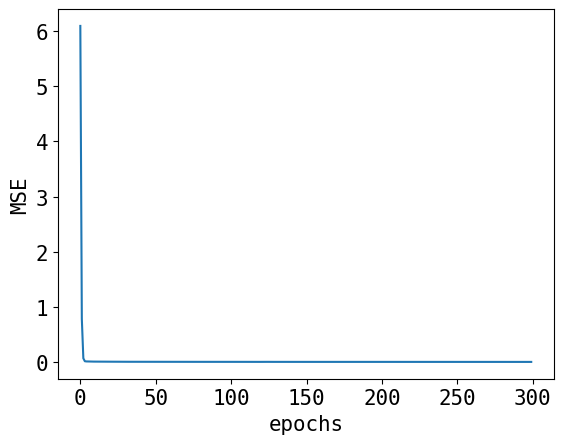

In [215]:
if improved_rnn_history != None:
    plt.plot(improved_rnn_history.history['loss'])
    plt.xlabel('epochs')
    plt.ylabel('MSE')
    plt.savefig('images/improved_rnn_model.png')
else:
    image = mpimg.imread(os.getcwd()+'\\images\\improved_rnn_model.png')
    plt.imshow(image)
    plt.show()

15/15 [==============================] - 0s 6ms/step


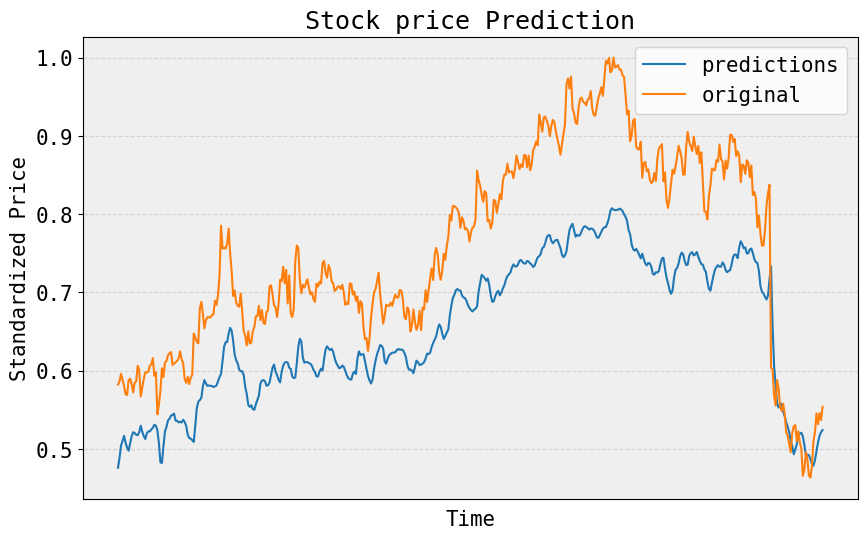

In [216]:
improved_rnn_y_pred = improved_rnn_model.predict(enhanced_X_test)
actual_pred_plot(enhanced_y_test, improved_rnn_y_pred.flatten())

In [217]:
mae, mse, rmse, r_squared = evaluation(enhanced_y_test, improved_rnn_y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 0.10274601748884825
MSE: 0.012341008836246656
RMSE: 0.11109009333080361
R2 Score: 0.24468482002900838


#### Sau khi cải tiến, model không tốt hơn so với trước khi cải tiến. Các nguyên gây ra có thể kể đến:
- ##### Không phải mọi mô hình đều cần regularization:
    Dropout và weight decay là các kỹ thuật regularization, được sử dụng để kiểm soát overfitting. Tuy nhiên, không mọi mô hình đều chịu tác động lớn từ overfitting, và trong một số trường hợp, mô hình có thể đã được thiết kế hoặc có đặc điểm tự điều chỉnh tự nhiên mà không cần sự kiểm soát bổ sung.
- ##### Kiến trúc mô hình không phù hợp:
    Có thể mô hình đã không được thiết kế đúng cách hoặc không đủ sâu và phức tạp để có lợi ích từ các kỹ thuật regularization. Trong một số trường hợp, việc thay đổi kiến trúc mô hình (thêm hoặc giảm số lượng lớp, thay đổi số lượng nơ-ron, thử nghiệm với các loại lớp khác nhau) có thể mang lại hiệu suất tốt hơn.
- ##### Dữ liệu không đủ lớn (rất có thể mô hình đang gặp vấn đề ở điểm này):
    Nếu tập dữ liệu của bạn quá nhỏ, có thể rằng mô hình đã không có đủ thông tin để học và tối ưu hóa. Trong trường hợp này, việc thêm regularization có thể không giúp nhiều, và bạn có thể cần phải xem xét thu thập thêm dữ liệu hoặc sử dụng các kỹ thuật khác để xử lý vấn đề dữ liệu không đủ lớn.
- ##### Thiết lập hyperparameters không phù hợp:
    Giá trị của dropout và weight decay cần phải được điều chỉnh cẩn thận để phù hợp với bài toán cụ thể và đặc điểm của dữ liệu. Nếu chúng quá lớn hoặc quá nhỏ, có thể ảnh hưởng đến hiệu suất của mô hình.
- ##### Tình trạng huấn luyện chưa đủ:
    Có thể mô hình chưa được huấn luyện đủ lâu. Việc tối ưu hóa mô hình có thể yêu cầu thêm thời gian huấn luyện để đạt đến hiệu suất tối ưu (chẳng hạn như tăng thêm epoch).